<a href="https://colab.research.google.com/github/irwanmazlin/raccoon_dataset/blob/master/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# df = pd.read_csv("/content/drive/MyDrive/Master/fraudTrain.csv")

# df = df.sample(frac=0.1)
# data_test = pd.read_csv("/content/drive/MyDrive/Master/fraudTest.csv")

# load the dataset

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/dataset2.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

df = pd.read_csv('fraudTrain.csv')
df = df.sample(frac=0.1)
# df_test = pd.read_csv('fraudTest.csv')




df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

df['dob'] = pd.to_datetime(df['dob'])

print("First 5 values of 'dob' column before dropping:\n")
print(df['dob'].head().to_markdown(numalign="left", stralign="left"))



First 5 values of 'dob' column before dropping:



ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [ ]:
today = datetime.today()


df['age'] = ((today - df['dob']).dt.days / 365.25).astype(int)

print(df.head().to_markdown(numalign="left", stralign="left"))




|    | Unnamed: 0   | trans_date_trans_time   | cc_num           | merchant                           | category      | amt    | first     | last    | gender   | street                       | city           | state   | zip   | lat     | long     | city_pop   | job                               | dob                 | trans_num                        | unix_time   | merch_lat   | merch_long   | is_fraud   | hour_of_day   | age   |
|:---|:-------------|:------------------------|:-----------------|:-----------------------------------|:--------------|:-------|:----------|:--------|:---------|:-----------------------------|:---------------|:--------|:------|:--------|:---------|:-----------|:----------------------------------|:--------------------|:---------------------------------|:------------|:------------|:-------------|:-----------|:--------------|:------|
| 0  | 0            | 2019-01-01 00:00:18     | 2703186189652095 | fraud_Rippin, Kub and Mann         | misc_net      | 4.97   | J

In [ ]:
df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

columns_to_encode = ['merchant', 'category', 'gender', 'city', 'state', 'job']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
coorelation = new_df.corr()
plt.figure(figsize(10,6))
sns.heatmap(coorelation, annot=True)

ValueError: could not convert string to float: '2019-08-11 19:38:33'

In [ ]:


# irwan punya

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# df = pd.read_csv("/content/drive/MyDrive/Master/fraudTrain.csv")

# data_test = pd.read_csv("/content/drive/MyDrive/Master/fraudTest.csv")

# load the dataset


df = pd.read_csv("/content/drive/MyDrive/Master/fraudTest.csv")
df = df.sample(frac=0.1)




df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

df['dob'] = pd.to_datetime(df['dob'])

print("First 5 values of 'dob' column before dropping:\n")
print(df['dob'].head().to_markdown(numalign="left", stralign="left"))

today = datetime.today()


df['age'] = ((today - df['dob']).dt.days / 365.25).astype(int)

print(df.head().to_markdown(numalign="left", stralign="left"))


df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

columns_to_encode = ['merchant', 'category', 'gender', 'city', 'state', 'job']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

First 5 values of 'dob' column before dropping:

|        | dob          |
|:-------|:-------------|
| 231419 | 6.56294e+17  |
| 244153 | 1.25712e+17  |
| 125906 | -3.91306e+17 |
| 220670 | -3.39466e+17 |
| 254387 | -8.5536e+17  |
|        | Unnamed: 0   | trans_date_trans_time   | cc_num           | merchant            | category     | amt    | first     | last   | gender   | street                             | city        | state   | zip   | lat     | long     | city_pop   | job                                         | dob                 | trans_num                        | unix_time   | merch_lat   | merch_long   | is_fraud   | hour_of_day   | age   |
|:-------|:-------------|:------------------------|:-----------------|:--------------------|:-------------|:-------|:----------|:-------|:---------|:-----------------------------------|:------------|:--------|:------|:--------|:---------|:-----------|:--------------------------------------------|:--------------------|:--------------

In [ ]:
from sklearn.model_selection import train_test_split
data_train.drop(columns = ['trans_date_trans_time', 'merchant', 'lat', 'long', 'merch_lat', 'merch_long'], inplace=True)

df_encoded = pd.get_dummies(data_train, columns=['category', 'gender', 'city', 'state', 'job'], prefix=['cat', 'gender', 'city', 'state', 'job'])
#split data
X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1037340, 1466)
X_test shape: (259335, 1466)
y_train shape: (1037340,)
y_test shape: (259335,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RF = RandomForestClassifier(random_state=42)

y_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
df = df.sample(frac=0.8, random_state=42)
df.to_csv('/content/reduced_data.csv', index=False)

NameError: name 'df' is not defined

***From the above calculations we can see that to 15 states covers 55% of the data for remaining state lets take it as other, and also capture the frequency encoding of the state column***

In [ ]:
top_15_states = new_df["state"].value_counts().reset_index().sort_values(by="count", ascending = False)[:15].get("state").tolist()

In [ ]:
new_df["state_cat"] = new_df["state"].apply(lambda x: x if x in top_15_states else "Other")

In [ ]:
# states = new_df["state"].value_counts().reset_index()
# plt.pie(x=states.get("count"), labels = states.get("state"), autopct='%1.1f%%')

In [ ]:
state_freq = new_df['state'].value_counts(normalize=True)
new_df['state_encoded'] = new_df['state'].map(state_freq)
new_df['state_encoded']

517683     0.017977
1012042    0.023210
581404     0.013522
1094893    0.006528
433289     0.017770
             ...   
517197     0.017770
517274     0.017770
517341     0.017770
517529     0.017770
517571     0.017770
Name: state_encoded, Length: 19302, dtype: float64

In [ ]:
new_df.sample(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,unix_time,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded
21968,2019-01-14 03:14:00,"fraud_Jones, Sawayn and Romaguera",misc_net,801.35,M,Fayetteville,NC,28314,238602,"Scientist, research (maths)",1326510840,1,125.223802,31,63.636364,552,Other,0.021915
400610,2020-11-25 08:50:21,fraud_Rodriguez Group,gas_transport,32.52,F,Putnam,IL,61560,754,"Presenter, broadcasting",1385369421,0,63.496272,62,40.540541,400,IL,0.033727


In [ ]:
new_df.drop(columns = ["state", "city", "merchant", "zip", "unix_time"], inplace = True)

In [ ]:
new_df.sample(2)

,trans_date_trans_time,category,amt,gender,city_pop,job,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded
268049,2019-05-12 22:04:37,shopping_net,993.66,M,151815,Further education lecturer,1,88.523478,36,63.095238,548,Other,0.011346
618045,2019-09-20 02:42:03,misc_net,792.40,M,42619,Environmental education officer,1,46.924874,48,61.538462,539,FL,0.033986


In [ ]:
new_df.job.nunique()

497

In [ ]:
sector_bag = {
    "IT": ["engineer", "developer", "programmer", "software", "IT", "technician", "architect", "system", "network",
           "administrator", "data scientist", "cybersecurity", "web developer", "analyst", "database", "devops"],

    "Education": ["teacher", "professor", "educator", "trainer", "lecturer", "scientist", "Orthoptist", "tutor",
                  "principal", "instructor", "counselor", "academic", "researcher", "dean", "school", "headmaster"],

    "Healthcare": ["doctor", "nurse", "medical", "therapist", "pharmacist", "health", "surgeon", "dentist", "clinician",
                   "physician", "optometrist", "radiologist", "paramedic", "midwife", "veterinarian", "psychiatrist"],

    "Finance": ["analyst", "accountant", "auditor", "banker", "financial", "investment", "controller", "broker",
                "consultant", "treasurer", "loan officer", "trader", "actuary", "economist", "portfolio", "credit"],

    "Marketing": ["manager", "executive", "specialist", "consultant", "advertising", "public relations", "strategist",
                  "director", "coordinator", "brand", "SEO", "content", "digital", "market research", "social media",
                  "copywriter"],

    "Manufacturing": ["operator", "mechanic", "assembler", "fabricator", "engineer", "technician", "welder",
                      "planner", "quality", "machinist", "production", "inspector", "supervisor", "foreman",
                      "toolmaker", "CNC"],

    "Retail": ["cashier", "salesperson", "store", "associate", "manager", "clerk", "shopkeeper", "merchandiser",
               "assistant", "retail", "customer service", "sales", "inventory", "buyer", "stocker", "checkout"],

    "Legal": ["lawyer", "attorney", "paralegal", "judge", "legal", "solicitor", "notary", "clerk", "litigator",
              "advocate", "barrister", "counsel", "magistrate", "prosecutor", "defense", "compliance"],

    "Hospitality": ["chef", "waiter", "bartender", "host", "manager", "receptionist", "housekeeper", "concierge",
                    "caterer", "cook", "hotel", "tour guide", "event planner", "sous chef", "sommelier", "valet"],

    "Construction": ["builder", "carpenter", "electrician", "plumber", "architect", "project manager", "site manager",
                     "surveyor", "foreman", "bricklayer", "roofer", "civil engineer", "construction", "contractor",
                     "inspector", "draftsman"]
}

def assign_sector(x):
    for key in sector_bag:
        for role in sector_bag[key]:
            if x.find(role) != -1:
                return key
    return "Other"



Text(0.5, 1.0, 'different job sectors')

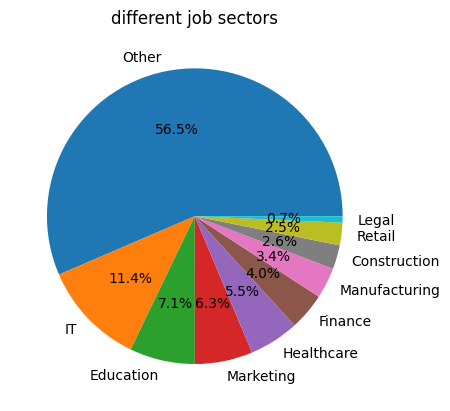

In [ ]:
new_df["job_sector"] = new_df["job"].apply(assign_sector)
job = new_df["job_sector"].value_counts().reset_index()
plt.pie(x = job.get("count"), labels = job.get("job_sector"),autopct='%1.1f%%')
plt.title("different job sectors")

In [ ]:
job_freq = new_df['job'].value_counts(normalize=True)
new_df['job_encoded'] = new_df['job'].map(job_freq)

In [ ]:
new_df.sample(2)

,trans_date_trans_time,category,amt,gender,city_pop,job,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded,job_sector,job_encoded
1262636,2020-06-08 22:40:34,health_fitness,19.17,F,242,Tourism officer,1,82.462858,37,16.666667,63,Other,0.018029,Other,0.001606
89353,2019-02-22 15:04:15,home,148.91,F,77,Film/video editor,0,83.351655,34,21.739130,143,Other,0.010051,Other,0.005595


In [ ]:
new_df["gender"] = new_df["gender"].apply(lambda x: int(x == "M"))

In [ ]:
new_df.drop(columns = ["job"], inplace = True)

In [ ]:
new_df.sample(2)

,trans_date_trans_time,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded,job_sector,job_encoded
144759,2019-03-19 01:05:09,grocery_pos,354.00,0,454,1,96.495642,52,70.0,589,Other,0.010051,Other,0.000518
1051387,2020-03-12 01:17:22,grocery_pos,376.06,0,1166,1,63.519216,41,75.0,628,NY,0.066832,Other,0.004196


***Let's extract some datetime info from trans_date_trans_time column***

In [ ]:
new_df["trans_date_trans_time"] = pd.to_datetime(new_df["trans_date_trans_time"])

In [ ]:
new_df["is_weekend"] = new_df["trans_date_trans_time"].dt.day_name().apply(lambda x : int((x == "Friday") | (x == "Sunday") | (x == "saturday")))

In [ ]:
def day_period(x):
    if x >=0 and x < 6: return "Night"
    elif x>= 6 and x <= 12: return "Morning"
    elif x> 12 and x <= 15: return "Afternoon"
    elif x> 15 and x <= 20: return "Evening"
    elif x> 20 and x <= 24: return "Night"


new_df["day_period"] = new_df["trans_date_trans_time"].dt.hour.apply(day_period)

In [ ]:
new_df["trans_month"] = new_df["trans_date_trans_time"].dt.month_name()

In [ ]:
new_df.drop(columns = ["trans_date_trans_time"], inplace = True)

In [ ]:
new_df.sample(2)

,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded,job_sector,job_encoded,is_weekend,day_period,trans_month
600177,grocery_pos,346.30,1,60,1,42.927432,82,62.068966,545,Other,0.017563,Other,0.001140,0,Night,September
468426,shopping_net,832.81,0,1493,1,34.539755,39,70.000000,591,Other,0.021759,Other,0.002228,1,Night,December


In [ ]:
numerical = ["amt", "city_pop", "distance", "age", "fraud_merchant_pct", "merchant_ordinal", "state_encoded","job_encoded"]
categorical = [col for col in new_df.columns if col not in numerical]
categorical, numerical

(['category',
  'gender',
  'is_fraud',
  'state_cat',
  'job_sector',
  'is_weekend',
  'day_period',
  'trans_month'],
 ['amt',
  'city_pop',
  'distance',
  'age',
  'fraud_merchant_pct',
  'merchant_ordinal',
  'state_encoded',
  'job_encoded'])

### Univariate Analysis ###
1) Categorical :
 - Observations
  - Female count is more in data.
  - Weekend days are almost half of no weekend days.
  - Lot of transaction happened at Night
  - In the month of December lot of transaction happened.

2) Numerical
 - Observations
  - No much observations, everything looks good with neglegible outliers


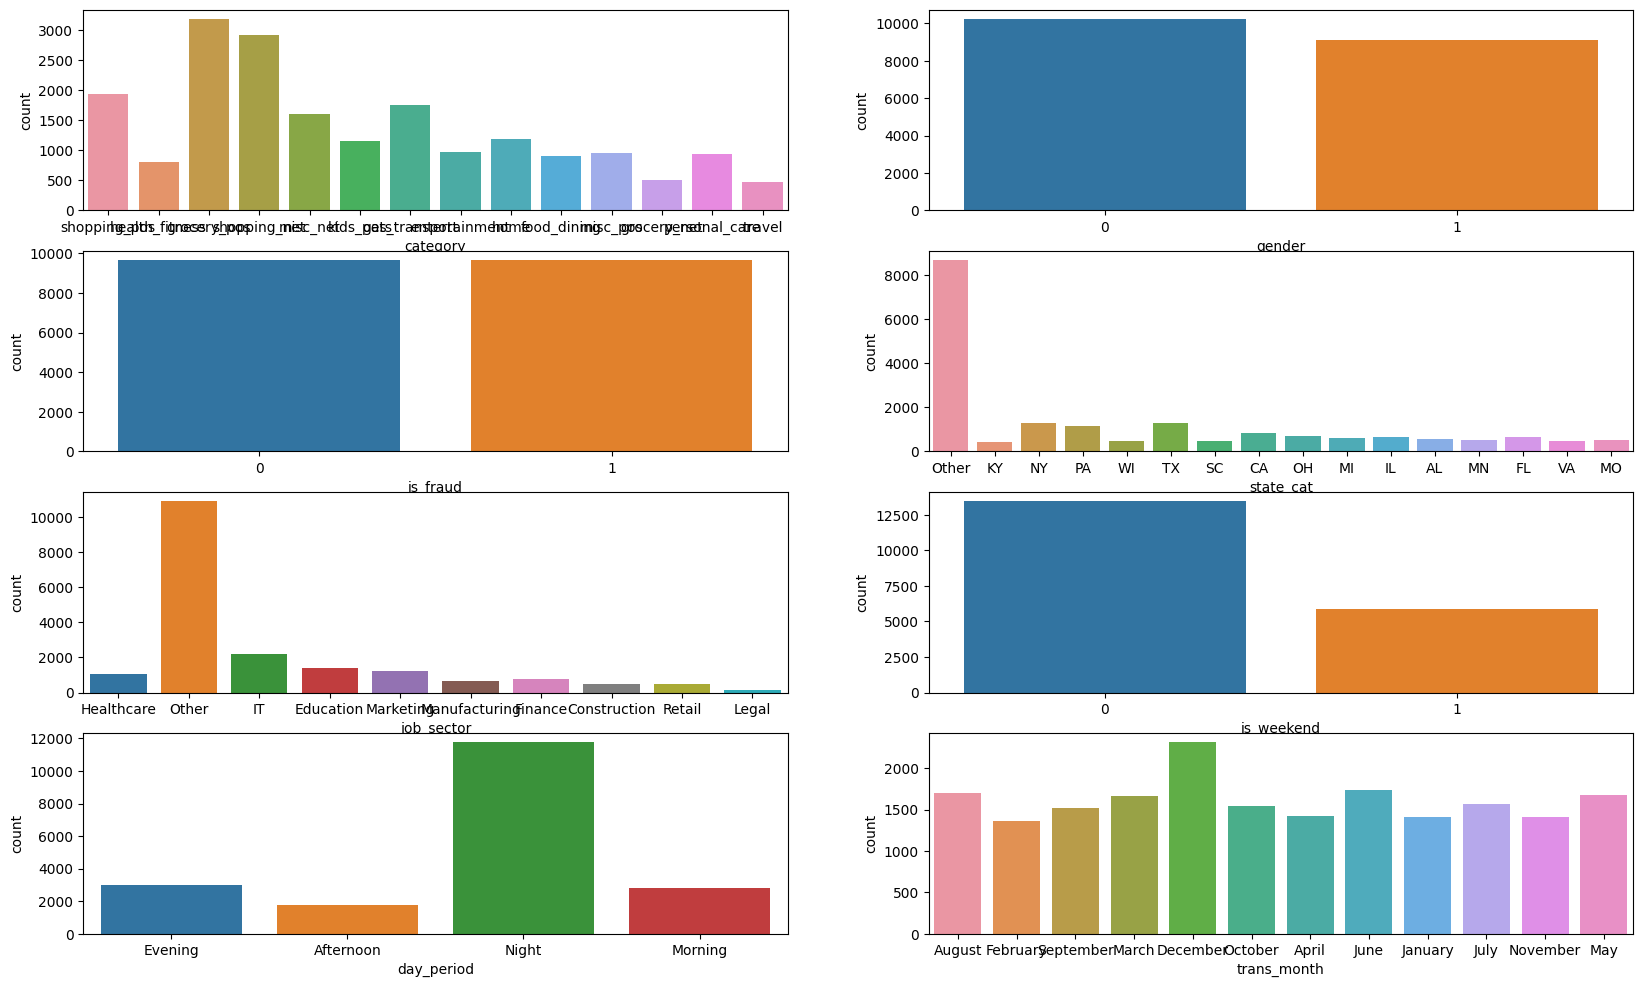

In [ ]:
plt.figure(figsize = (20, 12))
cnt = 0
for column in categorical:
    cnt += 1
    plt.subplot(4, 2, cnt)
    sns.countplot(x = new_df[column])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

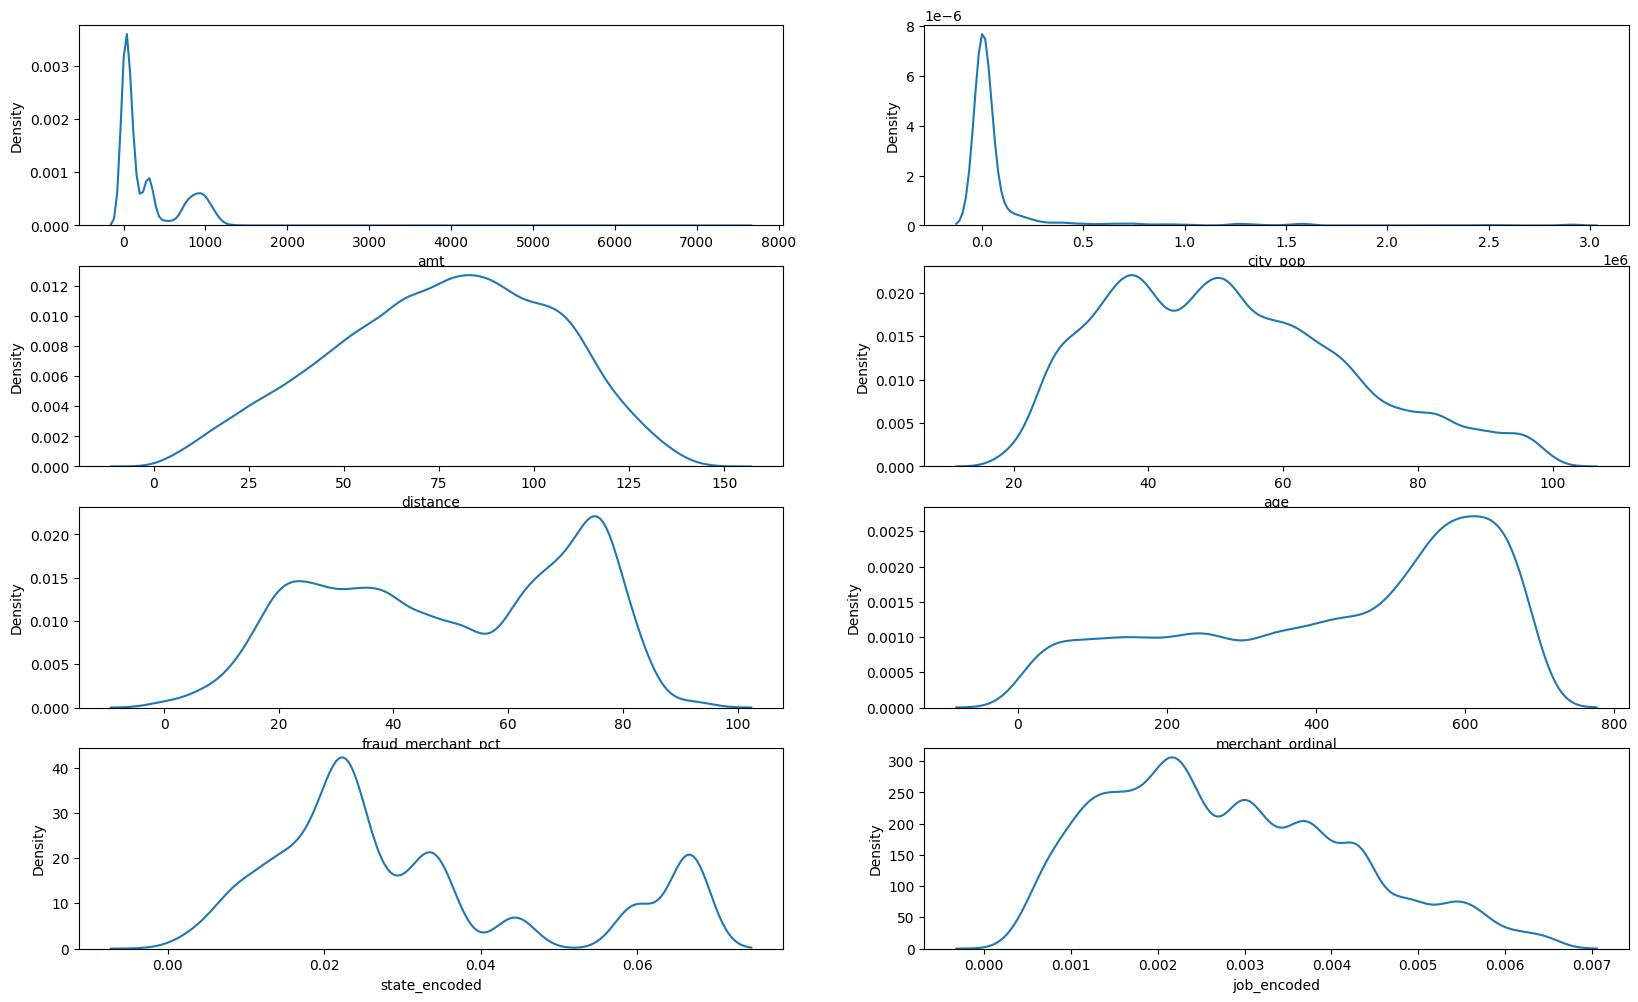

In [ ]:
plt.figure(figsize = (20, 12))
cnt = 0
for column in numerical:
    cnt += 1
    plt.subplot(4, 2, cnt)
    sns.kdeplot(x = new_df[column])

In [ ]:
for col in numerical:
    print(f"col = {col}\tskewness = {new_df[col].skew()}")

col = amt	skewness = 1.554209483468879
col = city_pop	skewness = 5.628461696119115
col = distance	skewness = -0.21901062311800198
col = age	skewness = 0.5025426083352379
col = fraud_merchant_pct	skewness = -0.14798502512234427
col = merchant_ordinal	skewness = -0.5319638334159288
col = state_encoded	skewness = 0.8575072428764584
col = job_encoded	skewness = 0.47826166724802566


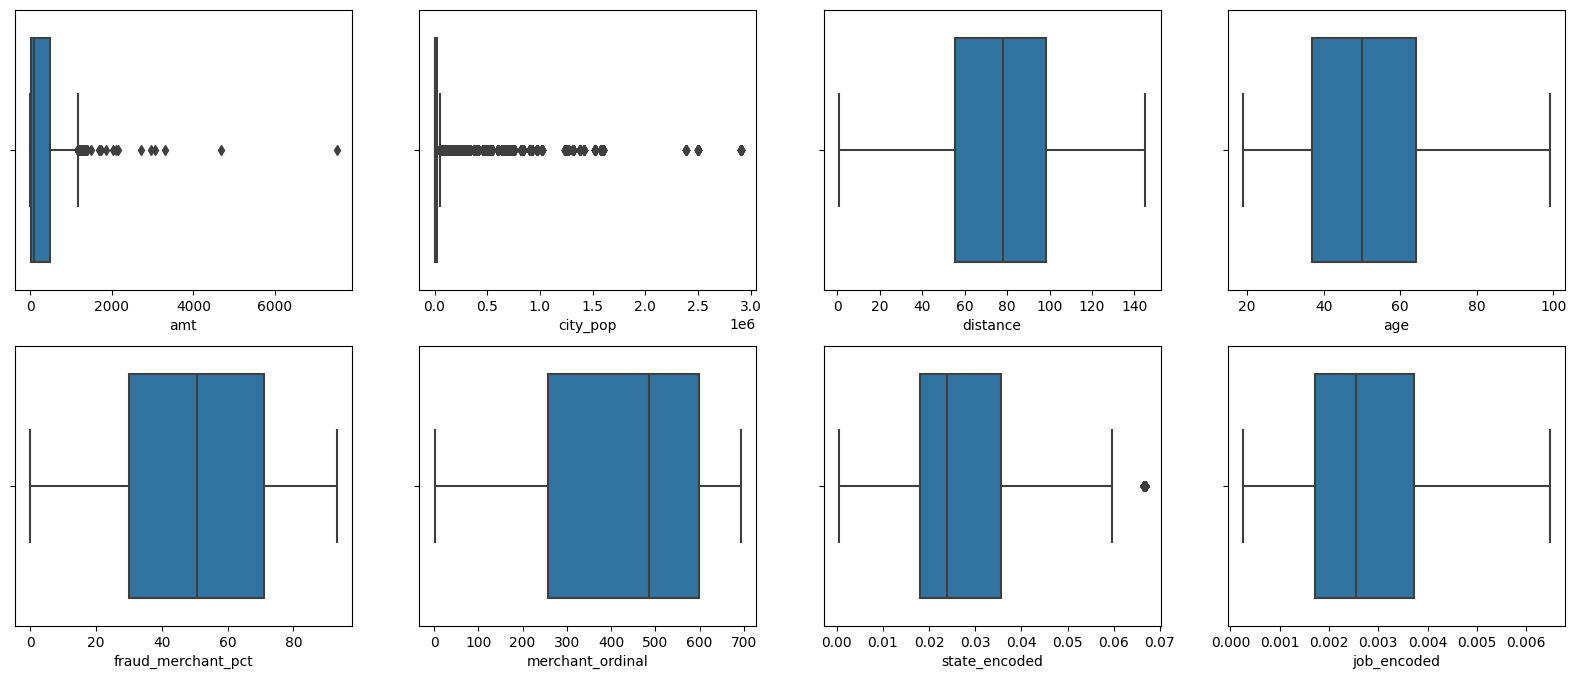

In [ ]:
plt.figure(figsize = (20, 8))
cnt = 0
for column in numerical:
    cnt += 1
    plt.subplot(2, 4, cnt)
    sns.boxplot(x = new_df[column])

### Bivariate Analysis ###

1) Numerical Vs Numerical
   ***Observations***

    - merchant ordinal and fraud merchant pct are +vely colinear and variance of fraud merchant pct > mercgant ordinal.
2) Categorical Vs Numerical
   ***Observations***
    - Chance of fraud increses if your transcation amount is high
    - fraud_merchant_pct directly prapotional to is_fraud.
    - Strangely more fraud happened with males compared to females.
    - Weekend has slightly higher amount of transactions.
    - Eventhough highest transaction occured in December the highest amount taken is in February so this is bit risky month.
    - Manufacturing sector has highest users of creditcard according to data
    - Lot of transactions happened in the night.
3) Categorical Vs Categorical
   ***Observations***
    - Shopping net and Misc net has highest fraud rate this might be due to their highest occurance in data
    - Since there is a highest amount transacted in febraury the fraud chances are higher in feb.
    - Although Manufacturer are more using credit card but construction sector facing more fraud, legal dep has less fraud bcz of less usage.
    - Although Femal count is high mens are facing fraud highly
    - Due to high transaction rate at Night the fraud chance also high at night


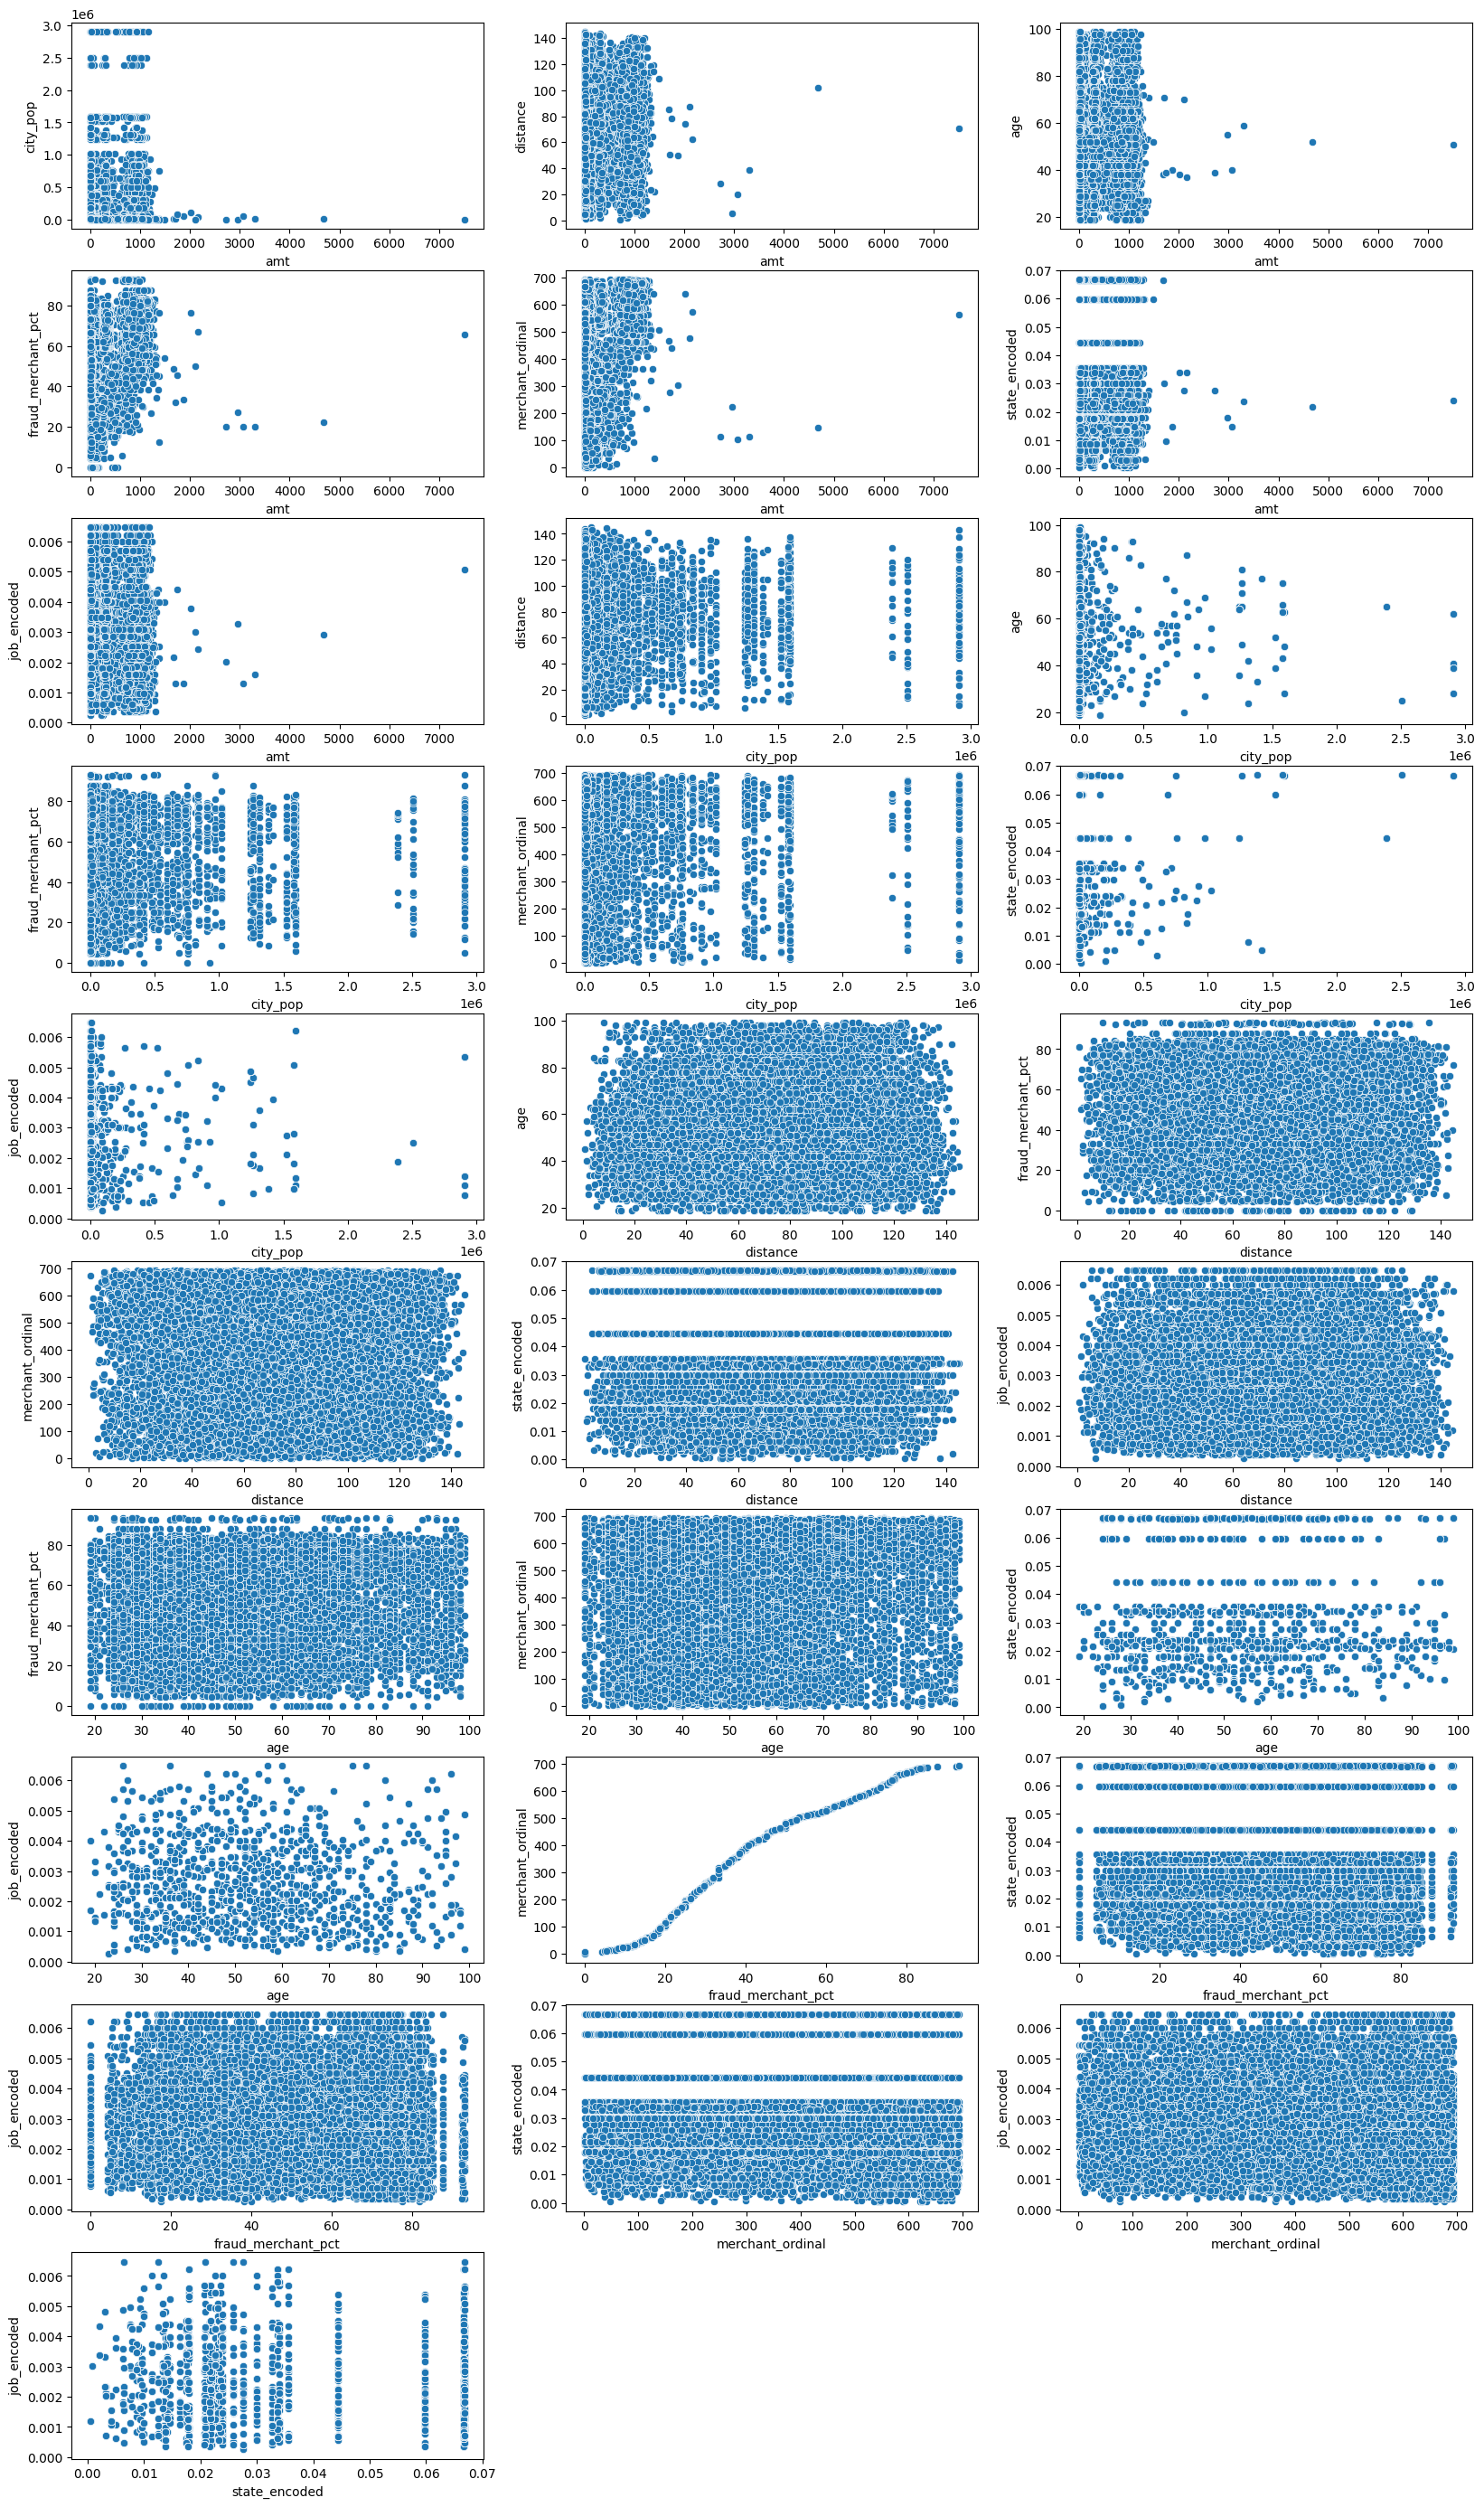

In [ ]:
plt.figure(figsize = (20, 35))
cnt = 0
for i in range(len(numerical)):
    for j in range(i + 1, len(numerical)):
        cnt += 1
        plt.subplot(10, 3, cnt)
        sns.scatterplot(x = new_df[numerical[i]], y = new_df[numerical[j]])

<Axes: >

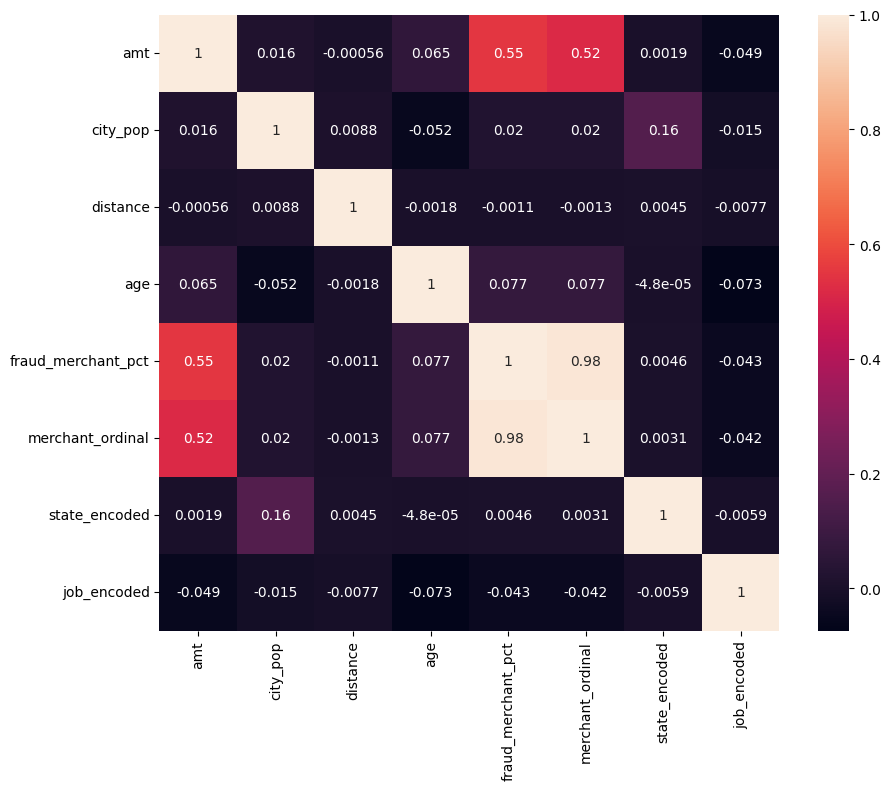

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = new_df[numerical].corr(), annot = True)

In [ ]:
new_df.drop(columns = ["merchant_ordinal"], inplace = True)
numerical.remove("merchant_ordinal")

In [ ]:
numerical

['amt',
 'city_pop',
 'distance',
 'age',
 'fraud_merchant_pct',
 'state_encoded',
 'job_encoded']

amt VS is fraud

<Axes: xlabel='is_fraud', ylabel='amt'>

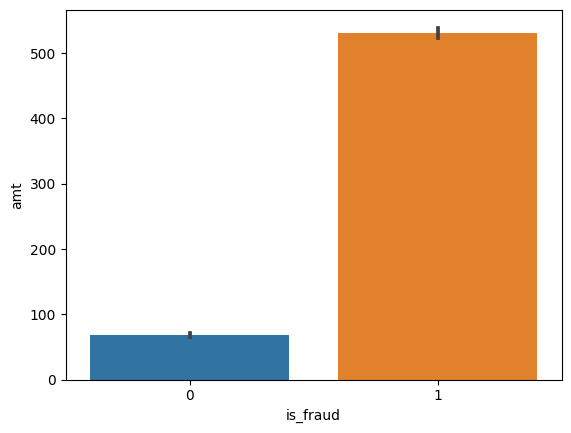

In [ ]:
sns.barplot(y = new_df["amt"], x=new_df["is_fraud"])

age VS is_fraud

<Axes: xlabel='is_fraud', ylabel='age'>

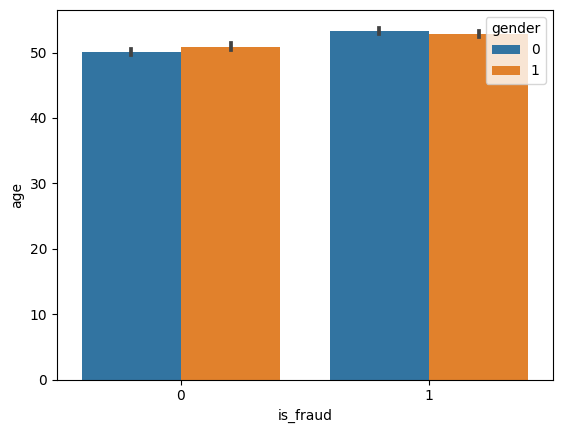

In [ ]:
sns.barplot(y = new_df["age"], x=new_df["is_fraud"], hue=new_df["gender"])

<Axes: xlabel='is_fraud', ylabel='fraud_merchant_pct'>

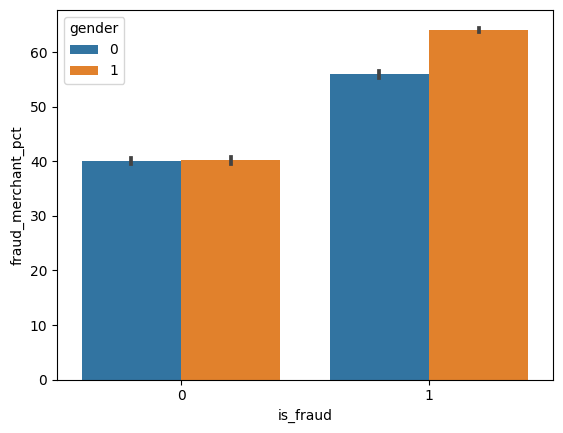

In [ ]:
sns.barplot(y = new_df["fraud_merchant_pct"], x=new_df["is_fraud"], hue = new_df["gender"])

In [ ]:
# sns.barplot(y = new_df["city_pop"], x=new_df["is_fraud"])
# sns.barplot(y = new_df["distance"], x=new_df["is_fraud"])

<Axes: xlabel='is_weekend', ylabel='amt'>

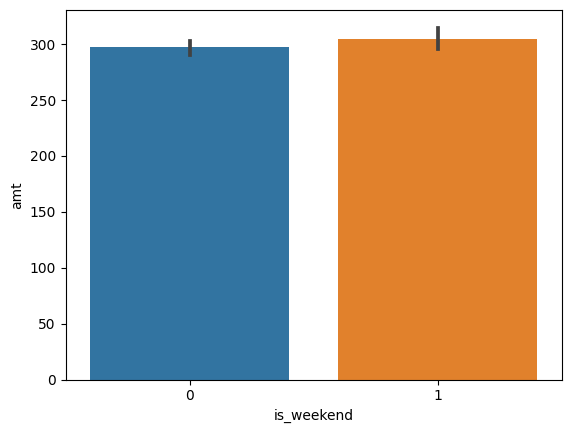

In [ ]:
sns.barplot(y = new_df["amt"], x=new_df["is_weekend"])

<Axes: xlabel='trans_month', ylabel='amt'>

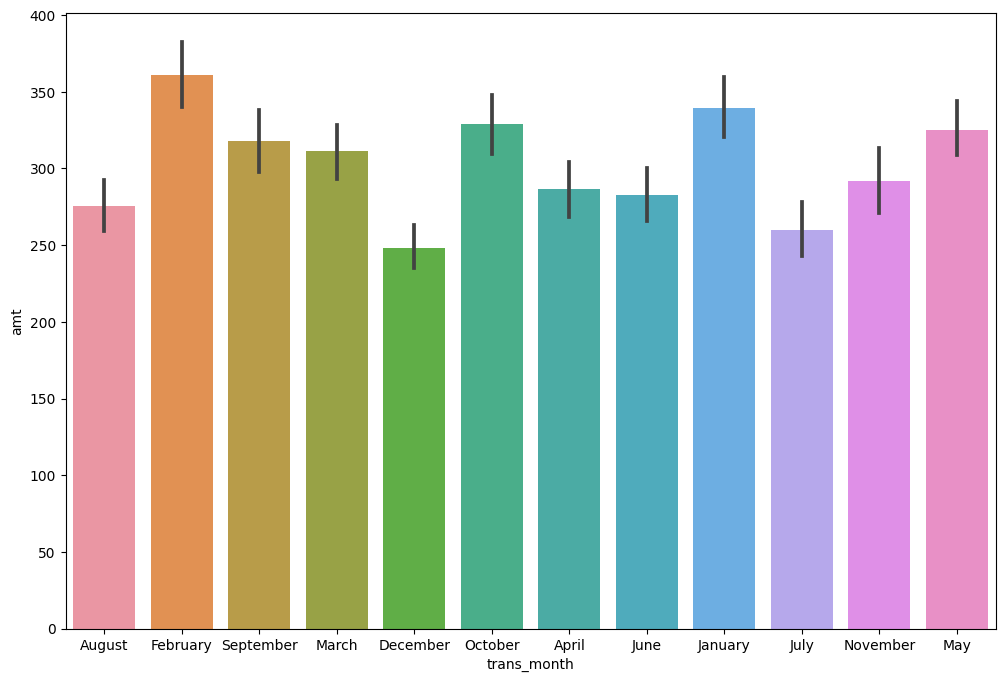

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(y = new_df["amt"], x=new_df["trans_month"])

<Axes: xlabel='category', ylabel='fraud_merchant_pct'>

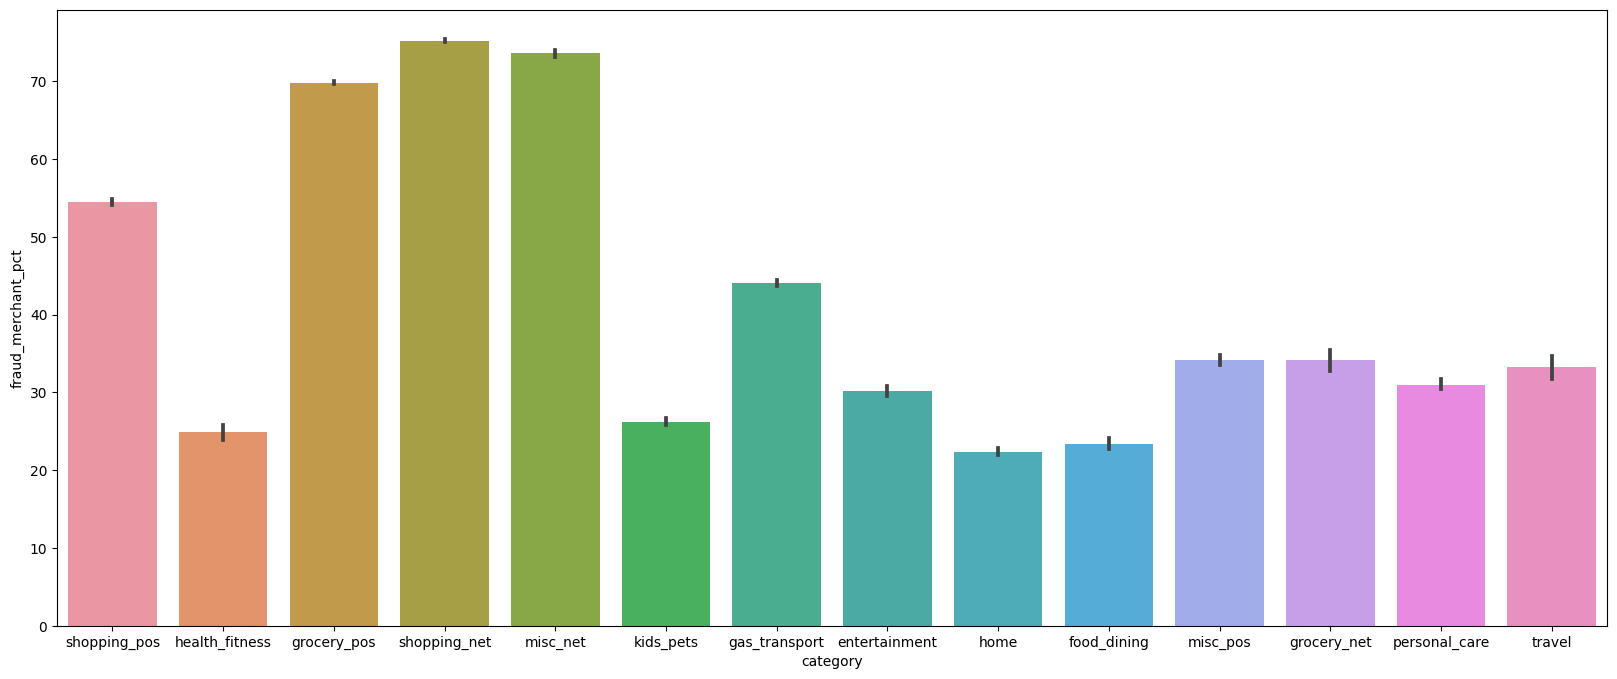

In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(y = new_df["fraud_merchant_pct"], x=new_df["category"])

In [ ]:
numerical, categorical

(['amt',
  'city_pop',
  'distance',
  'age',
  'fraud_merchant_pct',
  'state_encoded',
  'job_encoded'],
 ['category',
  'gender',
  'is_fraud',
  'state_cat',
  'job_sector',
  'is_weekend',
  'day_period',
  'trans_month'])

<Axes: xlabel='day_period', ylabel='amt'>

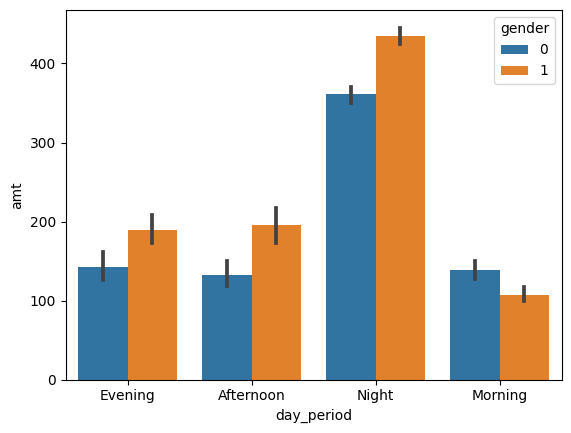

In [ ]:
# plt.figure(figsize = (12, 8))
sns.barplot(y = new_df["amt"], x=new_df["day_period"], hue = new_df["gender"])

<Axes: xlabel='is_fraud', ylabel='category'>

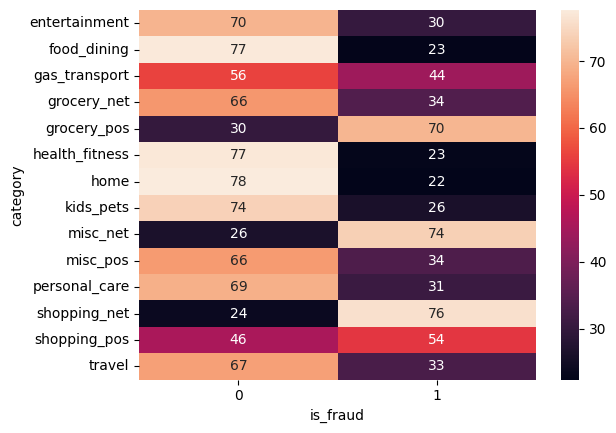

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["category"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='is_weekend'>

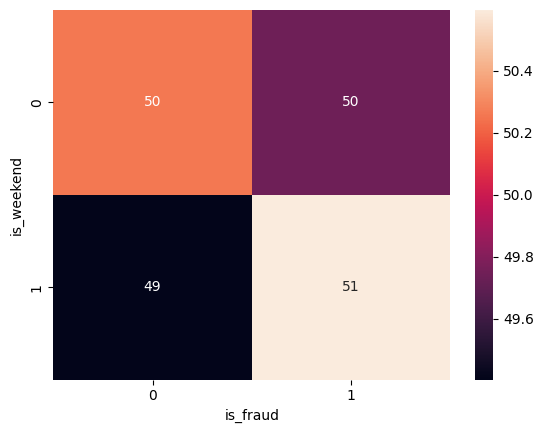

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["is_weekend"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='trans_month'>

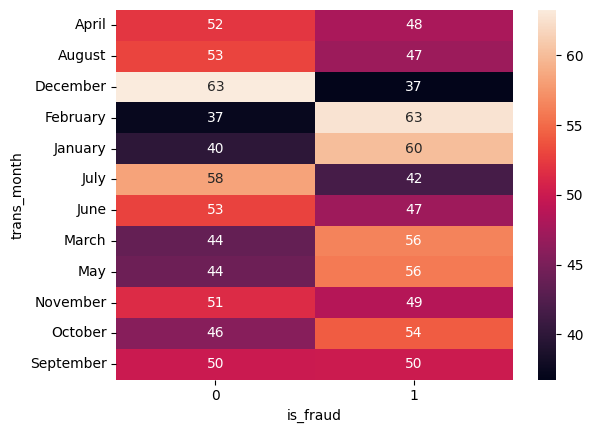

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["trans_month"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='job_sector'>

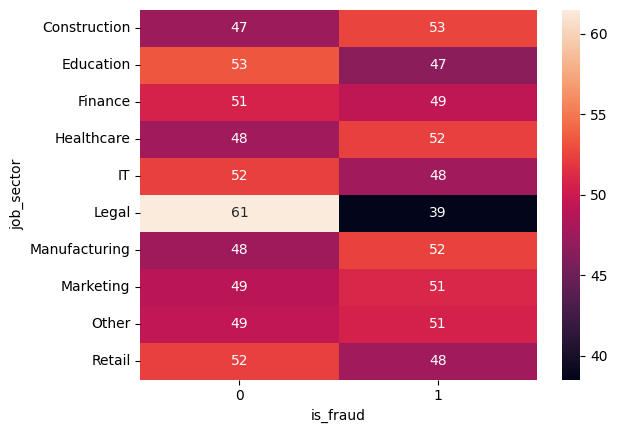

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["job_sector"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='gender'>

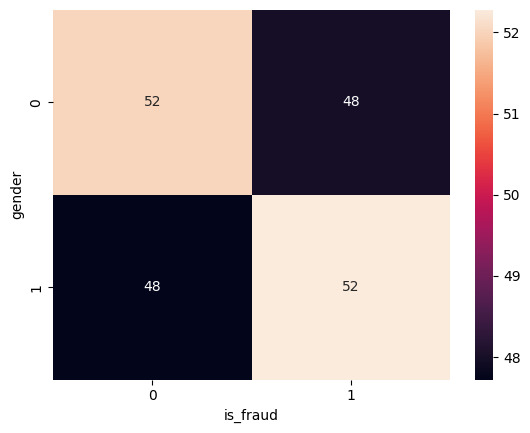

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["gender"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='is_weekend'>

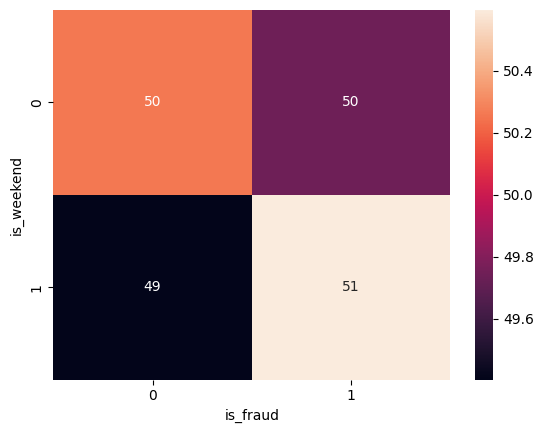

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["is_weekend"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='day_period'>

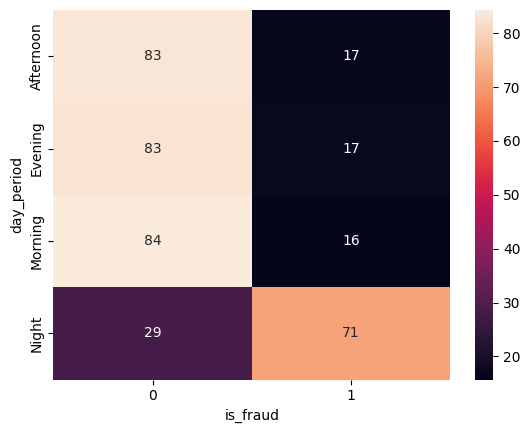

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["day_period"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='state_cat'>

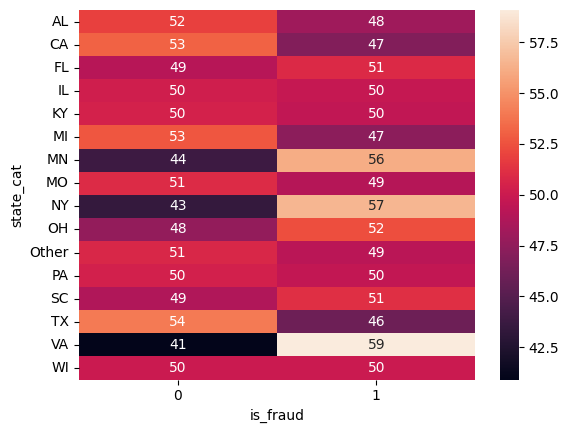

In [ ]:
sns.heatmap(data=pd.crosstab(new_df["state_cat"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

In [ ]:
new_df.drop(columns = ["state_cat", "is_weekend"], inplace = True)

In [ ]:
new_df.sample(2)

,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,state_encoded,job_sector,job_encoded,day_period,trans_month
446167,health_fitness,14.16,0,167,0,101.429507,35,17.647059,0.023884,Other,0.002124,Evening,December
253829,gas_transport,9.04,1,116001,1,112.218404,31,44.444444,0.021759,Retail,0.001710,Night,September


In [ ]:
final_df1 = new_df.drop(columns = ["job_sector"])
final_df2 = new_df.drop(columns = ["job_encoded"])


final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 517683 to 517571
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            19302 non-null  object 
 1   amt                 19302 non-null  float64
 2   gender              19302 non-null  int64  
 3   city_pop            19302 non-null  int64  
 4   is_fraud            19302 non-null  int64  
 5   distance            19302 non-null  float64
 6   age                 19302 non-null  int64  
 7   fraud_merchant_pct  19302 non-null  float64
 8   state_encoded       19302 non-null  float64
 9   job_encoded         19302 non-null  float64
 10  day_period          19302 non-null  object 
 11  trans_month         19302 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 1.9+ MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
oe = OrdinalEncoder(categories = [["February", "January", "March", "May", "October", "September","November", "April", "August", "June", "July", "December"]])

In [ ]:
final_df1["trans_month"] = oe.fit_transform(final_df1[["trans_month"]])
final_df2["trans_month"] = oe.fit_transform(final_df2[["trans_month"]])

In [ ]:
oe_period = OrdinalEncoder(categories = [["Night", "Evening", "Afternoon", "Morning"]])
final_df1["day_period"] = oe_period.fit_transform(final_df1[["day_period"]])
final_df2["day_period"] = oe_period.fit_transform(final_df2[["day_period"]])

In [ ]:
ohe = OneHotEncoder(sparse_output = False, drop = 'first')

In [ ]:
ohe_array = ohe.fit_transform(final_df1[["category"]])

In [ ]:
ohe_column = ohe.get_feature_names_out()
ohe_column

array(['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos',
       'category_travel'], dtype=object)

In [ ]:
ohe_df = pd.DataFrame(ohe_array, columns = ohe_column, index=final_df1.index)

In [ ]:
ohe_df.head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
517683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1012042,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581404,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
433289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
model_df = pd.concat([final_df1, ohe_df], axis = 1)

In [ ]:
model_df.sample(2)

,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,state_encoded,job_encoded,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
101344,travel,7.09,0,2566,0,113.542464,66,36.842105,0.029945,0.003678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
688408,food_dining,106.51,0,7646,0,65.892266,35,33.333333,0.035592,0.002487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model_df.drop(columns = ["category"], inplace = True)

In [ ]:
model_df.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'distance', 'age',
       'fraud_merchant_pct', 'state_encoded', 'job_encoded', 'day_period',
       'trans_month', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(model_df.drop(columns = ["is_fraud"]), model_df["is_fraud"], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(rf.feature_importances_))  # "husl" is just one example palette
sns.barplot(x = rf.feature_importances_, y = model_df.drop(columns = ["is_fraud"]).columns, palette=colors)
plt.title("Feature importance according to randomforest")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators' : [100, 150, 200],
    "max_depth" : [i for i in range(8)],
    "max_leaf_nodes" : [3,4,5,6,7,8,9,10]
}

hpt_rf = GridSearchCV(estimator=rf,
                   param_grid=params,
                   cv=skf,
                   verbose=1,
                   n_jobs=-1)

hpt_rf.fit(x_train, y_train)

In [ ]:
from sklearn. metrics import classification_report
rf = RandomForestClassifier(**hpt_rf.best_params_)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

adb = AdaBoostClassifier(random_state=42,)
params = {
    'n_estimators' : [100, 150, 200],
    "learning_rate" : [0.1, 0.01, 0.2, 0.3, 0.5, 1]
}

hpt = GridSearchCV(estimator=adb,
                   param_grid=params,
                   cv=skf,
                   verbose=1,
                   n_jobs=-1)

hpt.fit(x_train, y_train)

In [ ]:
from sklearn. metrics import classification_report
adb = AdaBoostClassifier(**hpt.best_params_)
adb.fit(x_train, y_train)
y_pred_adb = adb.predict(x_test)
print(classification_report(y_test, y_pred_adb))

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

xgb = XGBClassifier(random_state=42)
params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

hpt_xgb = GridSearchCV(estimator= xgb,
                   param_grid=params,
                   cv=skf,
                   verbose=1,
                   n_jobs=-1)

hpt_xgb.fit(x_train, y_train)

In [ ]:
from sklearn. metrics import classification_report
xgb = XGBClassifier(**hpt_xgb.best_params_)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = [
    ('xgb', xgb),  # Name and model instance
    ('adb', adb),  # Name and model instance
    # ('rf', rf)     # Name and model instance
]

vcls = VotingClassifier(estimators=estimators,voting="soft")

In [ ]:

vcls.fit(x_train, y_train)
y_pred_vcls = vcls.predict(x_test)
print(classification_report(y_test, y_pred_vcls))

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_vcls))

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = vcls.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_roc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# import joblib

# # Save the model
# joblib.dump(vcls, './models/voting_classifier_model.pkl')
# joblib.dump(xgb, './models/xgb_classifier_model.pkl')
# joblib.dump(adb, './models/adb_classifier_model.pkl')
# joblib.dump(rf, './models/random-forest_classifier_model.pkl')